<a href="https://colab.research.google.com/github/harris222/fma/blob/master/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

By: Harris Zheng
Date: February 10th, 2021

Personal-Note: Baseline-models shouldn't set the bar too high for our models?

In [ ]:
import os
import librosa
import librosa.display
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from tqdm import tqdm


In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore") # Only show warnings once

### First, make sure your notebook is up to date. In addition, uninstall tornado and downgrade it to version 5.1.1 if you can't connect to the notebook using Python 3.6. Else, proceed.

https://stackoverflow.com/questions/54955563/jupyter-notebook-cannot-connect-to-kernel

In [ ]:
# base = "./data/fma_metadata"
# tracks = pd.read_csv(os.path.join(base, "tracks.csv"), index_col=0, header=[0,1], engine="python")
# raw_tracks = pd.read_csv(os.path.join(base, "raw_tracks.csv"), header=0, enginer="python") ## engine problem: Python vs. C 
## https://www.shanelynn.ie/pandas-csv-error-error-tokenizing-data-c-error-eof-inside-string-starting-at-line/

### The following metadata csv will be used for feature extraction and accuracy calculation from scikit-learn models

Data is erronous, no matter the engine, we'll have to try to fix this later. Move onto librosa processing.

In [ ]:
# tracks.head()

In [ ]:
# raw_tracks.head()

### Librosa audio conversion to spectrogram for CNN input

In [ ]:
audios = []

In [ ]:
class LibrosaLoader():
    def __init___(self):
      pass
    def load(self, filepath, sampling_rate=22050, duration=30):
        # kaiser_fast is 3x faster than kaiser_best
        # x, sr = librosa.load(filepath, sr=sr, res_type='kaiser_fast')
        x, sr = librosa.load(filepath, sr=sampling_rate, duration=duration)
        return x


In [ ]:
loader = LibrosaLoader()

In [ ]:
for root, dirs, files in os.walk("./audios"):
  for filename in tqdm(files):
    audios.append(loader.load(os.path.join(root, filename)))
  
  break

  0%|          | 0/62 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  2%|▏         | 1/62 [00:01<01:47,  1.77s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  3%|▎         | 2/62 [00:03<01:45,  1.77s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  5%|▍         | 3/62 [00:05<01:44,  1.77s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  6%|▋         | 4/62 [00:07<01:41,  1.76s/it]/usr/local/lib/pyt

In [ ]:
len(audios)

95

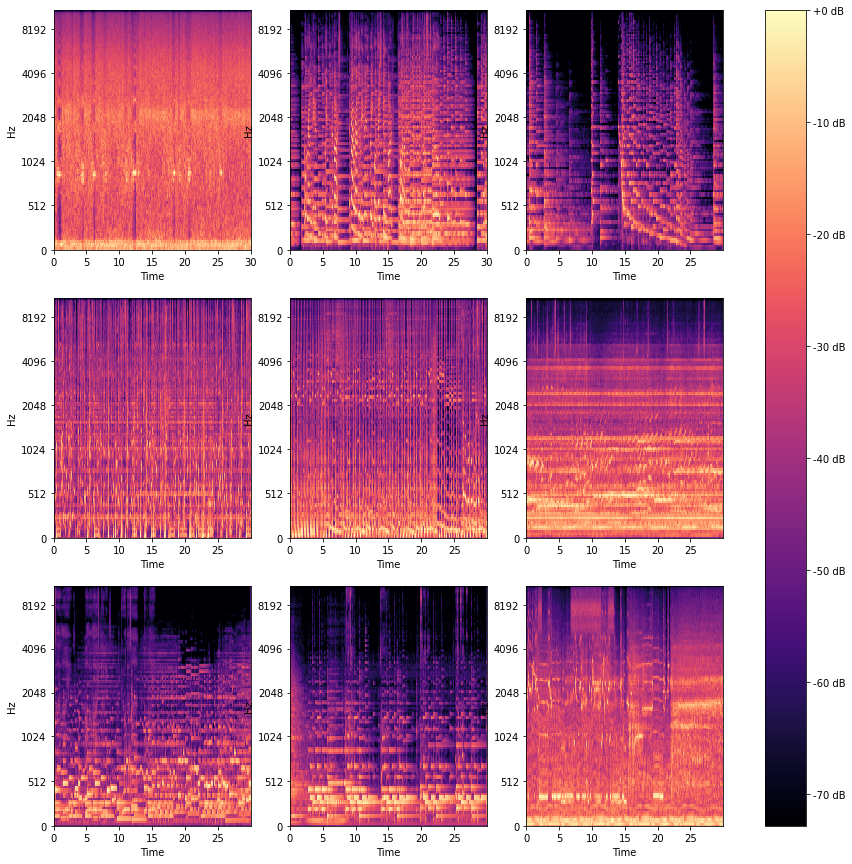

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
row = 0
col = 0
for i, audio in enumerate(audios[0:9]):
  S = librosa.feature.melspectrogram(audio) # sr=22050 default
  S_DB = librosa.power_to_db(S, ref=np.max)
  librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', ax=ax[row, col]);
  col += 1
  if (i+1) % 3 == 0:
    row += 1
    col = 0

fig.colorbar(img, ax=ax, format="%+2.f dB")

## Steps to take:
1. Mount files onto drive so that you don't have to 

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive
